# Types of ML Systems

# Based on Supervision
![Meaning of supervise](images/supervise_meaning.png)

## Supervised Learning

The training data is labeled
<!-- ![Supervised Learning](images/supervised_learning.png) -->
<img src="images/supervised_learning.png" style="width:500px"><br>

### Two types:
- **Classification**: Classifies into discrete classes
- **Regression**: Predicts numerical value

**Note**: Some *regression* algorithms (e.g. **Logistic Regression**) is used for classification

### Some supervised algorithms, we will read about:
- k Nearest Neighbour
- Linear Regression
- Logistic Regression
- SVM
- Decision Tree & Random Forest

## Unsupervised Learning

Training data is ***not*** labeled

### Four Types:
- **Clustering**: Facebook groups users based on their interests to recommend similar content.
- **Anomaly detection**: Detecting fraud in credit card transactions.
- **Visualization and dimensionality reduction**: Feature extraction - Car's mileage and age can be reduced to just wear-and-tear.
- **Association rule learning**: Walmart's 'diapers and beer' example. If a customer buys diapers, they are likely to buy beer too.

## Semi-supervised Learning

Training data is ***partially*** labeled (usually, mostly unlabled) <br>
Because, labeling data is quite expensive

### Example: Google Photos
- Recognizes similar faces and clusters them together (ideally)
- Once the user labels the clusters, it can name everyone in every photo

## Reinforcement Learning

Very different from the other three.

The agent (learning system) performs actions and gets reward (or penalties) in return. <br>
The goal is to get most rewards. <br>
The rewards/penalties guides the agent to choose the best strategy (called *policy*) <br>
<img src="images/reinforcement_learning.png" style="width:500px;">

# Based on Training
Can it learn incrementally from a stream of data?

### Example of Online Algorithm

In [1]:
def online_avg():
  average = 0
  count = 0
  while True:
    try:
      n = int(input("Enter the next number:"))
      sum = average * count + n
      count += 1
      average = sum / count
      print(f"Current Average: {average}")
    except ValueError:
      break

online_avg() # input: 4 3 2

Current Average: 4.0
Current Average: 3.5
Current Average: 3.0


### Example of Offline Algorithm

In [2]:
def offline_avg():
  nums = [int(x) for x in input("Numbers (space separated): ").split()]
  print(f"Average: {sum(nums)/len(nums)}")

offline_avg() # input: 4 3 2

Average: 3.0


## Batch Learning
- First the system is trained
- Then it's launched in production
- In production it does not learn anymore. It just applies what it learned

### What if you want to train on new data?
- You have a new system from scratch on full dataset (not just the new data, but *also the old data*)
- Stop the old system and replace it with the new one.

### Problems
- Trainig on the full dataset is expensive (sometimes impossible)
- Since it's expensive, training is done once in a day or week. So, it is of no use in rapidly changing dataset (e.g. stock price)
- If the system needs to learn autonomously and has limited resources (e.g. mars rover) storing a full dataset is not feasible

## Online Learning
The name is a bit misleading. So, we should call it ***increamental learning***

The system is trained increamentally by feeding data instances sequentially, either individually or in small groups (called mini-batches)

### Out-of-core Learning
If the dataset is so huge that it does not fit in the machine's main (core) memory, increamental learning algorithms are used.

Out-of-core learning is usually done offline. Which is why the name *online* learning is misleading.

### Learning rate
Learning rate is a parameter of increamental learning that determines how fast the system should adapt to new changes
- If it's too high, the system will rapidly adapt to new data, but quickly forget old data
- If it's too low, the system will learn slowly

(we will learn more about this in the *Gradient Descent* section)

# Based on Approach to Generalization
How does the model predict on never-before-seen data?

## Instance-based Learning
- The system learns the training set by heart
- When it encounters never-before-seen data, it compares them to the learned examples (or a subset of them) using some ***similarity measure***

### Example
![Instance-based Learning](images/instance_based_learning.png)<br>
The new instance will be classified as a triangle because the majority of the most similar instances belong to that class

### Similarity Measure
These algorithms rely on a measure of similarity.

**Example: Spam Filter**<br>
A very basic similariy measure for two emails would be the count of identical words

### Example: Can money buy happiness?

In [3]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt

# Download latest version
path = kagglehub.dataset_download("unsdsn/world-happiness")

happiness_df = pd.read_csv(path + "/2017.csv")

path = kagglehub.dataset_download("nitishabharathi/gdp-per-capita-all-countries")

gdp_df = pd.read_csv(path + "/GDP.csv")

/home/roundspecs/Developer/learning_ml/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
happiness_df = happiness_df[['Country', 'Happiness.Score']]
gdp_df = gdp_df[['Country ', '2017']]

In [5]:
gdp_df = gdp_df.rename(columns={'Country ': 'Country', '2017': 'GDP'})
combined_df = pd.merge(
    happiness_df,
    gdp_df,
    on='Country',  # Same column name after renaming
    how='inner'
)
df = combined_df.dropna()
df = df[(df['GDP'] > 25000) & (df['GDP'] < 60000)]

<Axes: xlabel='GDP', ylabel='Happiness.Score'>

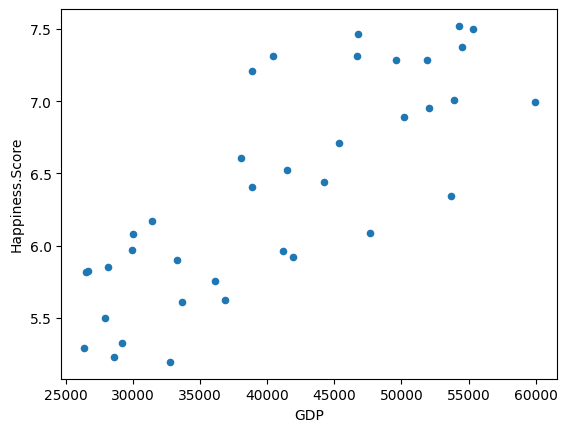

In [6]:
df[['Happiness.Score', 'GDP']].plot.scatter(
  x='GDP', y='Happiness.Score'
)

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
import numpy as np

In [8]:
X = df[["GDP"]].values
y = df["Happiness.Score"].values

model = KNeighborsRegressor(n_neighbors=5)

model.fit(X, y)

X_new = [[37_655.2]] # GDP of the Cyprus
predicted_happiness = model.predict(X_new)
print(f"Predicted Happiness Score for Cyprus: {predicted_happiness[0]}")

Predicted Happiness Score for Cyprus: 6.320799922943114


## Model-based Learning
- The system creates a model based on the training set
- When it encounters never-before-seen data, it uses the model to make predictions
- During prediction, it does not even need to look at the training set

### Example: Can money buy happiness?

<Axes: xlabel='GDP', ylabel='Happiness.Score'>

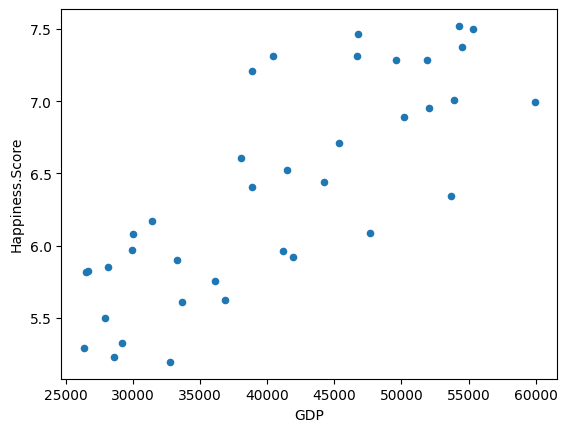

In [12]:
df[['Happiness.Score', 'GDP']].plot.scatter(
  x='GDP', y='Happiness.Score'
)

### Model Selection
We have to select a model that would represent the our data. <br>
Let's go with a ***linear model***.

In [9]:
X = df[["GDP"]].values
y = df["Happiness.Score"].values

model = LinearRegression()

model.fit(X, y)

X_new = [[37_655.2]] # GDP of the Cyprus
predicted_happiness = model.predict(X_new)
print(f"Predicted Happiness Score for Cyprus: {predicted_happiness[0]}")

Predicted Happiness Score for Cyprus: 6.209506580812942


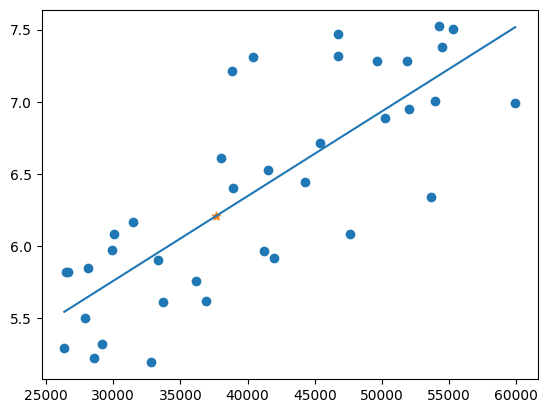

In [11]:
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred = model.predict(X_range)

plt.scatter(X, y)  # Scatter plot of actual data
plt.plot(X_range, y_pred)  # Regression line
plt.scatter(X_new, predicted_happiness, marker='*')  # Cyprus point
plt.show()

### How did we know which line would ***best represent*** our data?
We have to pick one of the following
- **Utility function**: (a.k.a fitness function) Measures how ***good*** your model is
- **Cost function**: Measures how ***bad*** your model is

The goal is to ***maximize the utility*** or ***minimize the cost***